<br><br>
<font size='6'><b>Recurrent Neural Network
</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

Table of Contents
<div id="toc"></div>

# 1. Recurrent Neural Network (RNN)


- RNNs are a family of neural networks for processing sequential data

## 1.1. Feedforward Network and Sequential Data

<br>
<center><img src="./image_files/hidden_state_extraction.png" width = 400></center>
<br>

- Separate parameters for each value of the time index


- Cannot share statistical strength across different time indices

<br>
<center><img src="./image_files/state_dynamics.png" width = 550></center>
<br>


## 1.2. Representation Shortcut


- Input at each time is a vector 
- Each layer has many neurons 
- Output layer too may have many neurons 
- But will represent everything simple boxes 
- Each box actually represents an entire layer with many units


<br>
<center><img src="./image_files/Rep_shortcut.png" width = 500></center>
<br>


## 1.3. An Alternate Model for Infinite Response Systems


- The state-space model

$$
\begin{align*}
h_t &= f(x_t, h_{t-1})\\
y_t &= g(h_t)
\end{align*}
$$


- This is a recurrent neural network 
- State summarizes information about the entire past


- Single Hidden Layer RNN (Simplest State-Space Model)

<br>
<center><img src="./image_files/hidden_rnn_01.png" width = 600></center>
<br>

- Multiple Recurrent Layer RNN

<br>
<center><img src="./image_files/hidden_rnn_02.png" width = 600></center>
<br>

- Recurrent Neural Network
    - Simplified models often drawn
    - The loops imply recurrence


<br>
<center><img src="./image_files/recurrence.png" width = 600></center>
<br>

# 2. LSTM Networks

## 2.1. Long-Term Dependencies

- Gradients propagated over many stages tend to either __vanish__ or __explode__
- Difficulty with long-term dependencies arises from the exponentially smaller weights given to long-term interactions
- Introduce a memory state that runs through only linear operators
- Use gating units to control the updates of the state


<br>
<center><img src="./image_files/vanishing_gradient.png" width = 550></center>
<br>


Example: "I grew up in France… I speak fluent _French_."

<br>
<center><img src="./image_files/RNN-longtermdependencies.png" width = 500></center>
<br>


## 2.2. Long Short-Term Memory (LSTM)

- Consists of a memory cell and a set of gating units
    - Memory cell is the context that carries over
    - Forget gate controls erase operation
    - Input gate controls write operation
    - Output gate controls the read operation


<br>
<center><img src="./image_files/gates_lstm.png" width = 550></center>

<br>
<center><img src="./image_files/LSTM3-chain.png" width = 550></center>
<br>

- Connect LSTM cells in a recurrent manner
- Train parameters in LSTM cells

### 2.2.1. LSTM for Classification

<br><br>
<center><img src='./image_files/RNNforclf.png' width = 500></center>


### 2.2.2. LSTM for Prediction

<br><br>
<center><img src='./image_files/RNNforpre.png' width = 500></center>

# 3. LSTM with TensorFlow

- An example for predicting a next piece of an image
- Regression problem
- Again, MNIST dataset


- Time series data and RNN

<br><br>
<center><img src='./image_files/time_series_RNN.png' width = 600></center>

In [1]:
!nvidia-smi

Tue Apr 27 22:41:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 440.82       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:03:00.0  On |                  N/A |
| 33%   60C    P2    70W / 250W |    422MiB / 11175MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:04:00.0 Off |                  N/A |
| 29%   35C    P8     9W / 250W |    147MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

## 3.1. Import Library

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from six.moves import cPickle

In [4]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
tf.config.experimental.set_visible_devices(devices=gpus[0], device_type='GPU')
tf.config.experimental.set_memory_growth(device=gpus[0], enable=True)

In [5]:
print(np.__version__)

1.19.0


In [6]:
#!pip install numpy==1.19

## 3.2. Load MNIST Data

- Import acceleration signal of rotation machinery

- Download [files](https://www.dropbox.com/s/42dic65cf17o0eu/rnn_time_signal.pkl?dl=1)

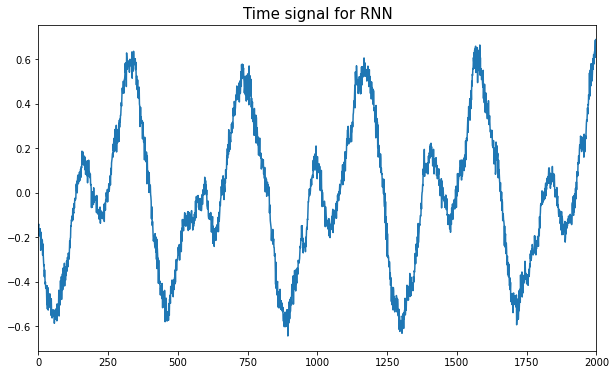

In [7]:
data =  cPickle.load(open('./data_files/rnn_time_signal.pkl', 'rb'))

plt.figure(figsize = (10,6))
plt.title('Time signal for RNN', fontsize=15)
plt.plot(data[0:2000])
plt.xlim(0,2000)
plt.show()

## 3.3. LSTM Model Training

<br>
<center><img src="./image_files/RNN_ac_edit.png" width = 650></center>
<br>

In [8]:
n_step = 25
n_input = 100

# LSTM shape
n_lstm1 = 100
n_lstm2 = 100

# fully connected
n_hidden = 100
n_output = 100

In [9]:
'''
lstm network = tf.kears.models.Sequential
1. tf.keras.layers.Input(shape = (n_stpe, n_input)),
2. tf.keras.layers.LSTM
3. tf.keras.layers.Dense
'''
lstm_network = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (n_step, n_input)), # 2500개씩 데이터 input
    tf.keras.layers.LSTM(n_lstm1, return_sequences = True),
    tf.keras.layers.LSTM(n_lstm2),
    tf.keras.layers.Dense(n_hidden),
    tf.keras.layers.Dense(n_output)
])

lstm_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25, 100)           80400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
Total params: 181,000
Trainable params: 181,000
Non-trainable params: 0
_________________________________________________________________


In [10]:
'''
lstm_network.compile

optimizer = adam,
loss = mean_squared_error
metrics = mse
'''
lstm_network.compile(optimizer = 'adam',
                     loss = 'mean_squared_error', # 2500개를 보고 새로운 100개를 예측, regression test기 때문에 mse loss사용
                     metrics = ['mse']
                    )

In [11]:
def dataset(data, n_samples, n_step = n_step, dim_input = n_input, dim_output = n_output, stride = 5):
    
    train_x_list = []
    train_y_list = []
    for i in range(n_samples): # n_sample만큼 for문 반복
        train_x = data[i*stride:i*stride + n_step*dim_input] # 2500개씩 옆으로 가면서 list에 append
        train_x = train_x.reshape(n_step, dim_input)
        train_x_list.append(train_x)

        train_y = data[i*stride + n_step*dim_input:i*stride + n_step*dim_input + dim_output] # 2500번부터 그다음 100개씩 list에 append
        train_y_list.append(train_y)

    train_data = np.array(train_x_list)
    train_label = np.array(train_y_list)

    test_data = data[10000:10000 + n_step*dim_input] # test data는 10000번째 데이터부터 시작
    test_data = test_data.reshape(1, n_step, dim_input)
    
    return train_data, train_label, test_data

In [12]:
train_data, train_label, test_data = dataset(data, 5000)

In [13]:
train_data.shape

(5000, 25, 100)

In [14]:
train_label.shape

(5000, 100)

In [15]:
'''
lstm_network 학습하기
'''
lstm_network.fit(train_data, train_label, epochs = 3)

Epoch 1/3
157/157 [==============================] - 1s 9ms/step - loss: 0.0342 - mse: 0.0342
Epoch 2/3
157/157 [==============================] - 1s 8ms/step - loss: 0.0064 - mse: 0.0064
Epoch 3/3
157/157 [==============================] - 1s 9ms/step - loss: 0.0050 - mse: 0.0050


## 3.4. Testing or Evaluating


- Predict future time signal

In [16]:
test_data.shape # 25개의 step에 100개의 input을 가진 하나의 test data
# 갯수, n_step, n_input

(1, 25, 100)

In [17]:
test_pred = lstm_network.predict(test_data).reshape(-1)
test_pred.shape

(100,)

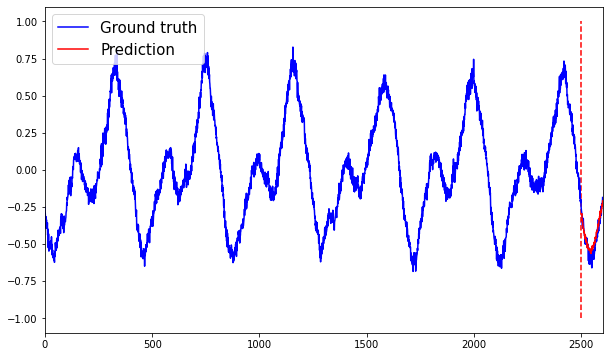

In [18]:
'''
test_pred = lstm_network로 test_data에 대한 prediction
'''
test_pred = lstm_network.predict(test_data).reshape(-1)
test_label = data[10000:10000 + n_step*n_input + n_input]

plt.figure(figsize=(10,6))
plt.plot(np.arange(0, n_step*n_input + n_input), test_label, 'b', label = 'Ground truth')
plt.plot(np.arange(n_step*n_input, n_step*n_input + n_input), test_pred, 'r', label = 'Prediction')
plt.vlines(n_step*n_input, -1, 1, colors = 'r', linestyles = 'dashed')
plt.legend(fontsize = 15, loc = 'upper left')
plt.xlim(0, len(test_label))
plt.show()

(1, 100)
(1, 1, 100)


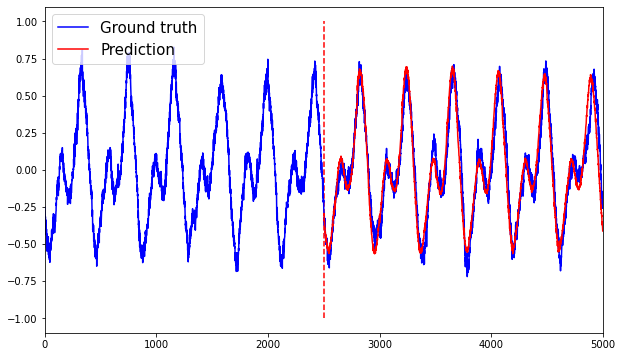

In [19]:
gen_signal = []
'''
위에서 예측한 test_pred를 기반으로 25번 반복하여 예측

for i in range(n_step):
    1. test_data가 lstm_network를 들어가 나오는 test_pred
    2. for문이 돌때마다 생성되는 test_pred을 기록 (hint: append())
    3. test_pred = test_pred[:, np.newaxis, :]
    4. test_data = test_data[:, 1:, :] --> data shape 유지를 위해서
    5. test_data와 test_pred 를 axis = 1방향으로 stack (hint: np.concatenate([test_data, test_pred], axis = 1))
'''
for i in range(n_step):
    test_pred = lstm_network.predict(test_data)
    if i == 0 :
        print(test_pred.shape) # 갯수, 데이터 수
    gen_signal.append(test_pred.reshape(-1))
    test_pred = test_pred[:, np.newaxis, :] # 축을 하나 새로 만들겠다.
    if i == 0 :
        print(test_pred.shape)    
    test_data = test_data[:, 1:, :] # 맨앞에 100개를 버리고 예측한 100개를 추가해서 25,100의 데이터로 만들겠다.
    test_data = np.concatenate([test_data, test_pred], axis = 1) # hstack과 같다


gen_signal = np.concatenate(gen_signal)

test_label = data[10000:10000 + n_step*n_input + n_step*n_input]

plt.figure(figsize=(10,6))
plt.plot(np.arange(0, n_step*n_input + n_step*n_input), test_label, 'b', label = 'Ground truth')
plt.plot(np.arange(n_step*n_input,  n_step*n_input + n_step*n_input), gen_signal, 'r', label = 'Prediction')
plt.vlines(n_step*n_input, -1, 1, colors = 'r', linestyles = 'dashed')
plt.legend(fontsize=15, loc = 'upper left')
plt.xlim(0, len(test_label))
plt.show()

In [20]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>